In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [22]:
# we're making a demo of this:
# https://playground.tensorflow.org/

n_pts = 500
X,y = datasets.make_circles(
    n_samples=n_pts, 
    random_state=123, 
    noise=0.1, # try noise to see how datas changes
    factor=0.2 # the inner circle diameter = 20% large circle diameter 
)

print(X)
print(y)

[[ 6.98553633e-01 -3.78289607e-01]
 [-2.48422424e-01  1.91071221e-01]
 [-1.78759035e-01  2.53697475e-01]
 [-7.30467124e-03 -2.59266690e-01]
 [-1.59844140e-01  2.66915921e-01]
 [-8.01071690e-01 -1.08656135e-01]
 [ 1.00816914e+00  2.07309295e-01]
 [ 4.39780516e-02 -2.80236072e-01]
 [-8.34853704e-02 -1.38114367e-01]
 [-9.88928208e-01 -9.26102014e-02]
 [ 8.83638650e-02  1.96647051e-01]
 [ 2.22010570e-01  5.62848283e-02]
 [ 7.74176833e-01  8.22258534e-01]
 [ 6.42098042e-02  1.77475658e-01]
 [ 3.29904597e-01 -6.76348560e-02]
 [ 9.37162087e-01  2.05987221e-01]
 [-2.00792169e-01  5.35547075e-02]
 [ 5.32997317e-02 -2.82138380e-01]
 [-9.93783900e-02 -3.28183801e-01]
 [ 1.02684872e+00 -2.66939738e-01]
 [-8.69193490e-01  6.85448273e-01]
 [-6.70339467e-03  2.44518907e-01]
 [ 2.31538284e-02 -8.12416827e-01]
 [ 1.03822075e-01  1.19298417e-01]
 [-9.57389366e-01 -3.49206448e-01]
 [-7.98982279e-02  2.30581375e-01]
 [ 1.31496662e-01  4.30585961e-02]
 [ 3.68169092e-02  9.51356467e-01]
 [ 6.71357733e-01 -8

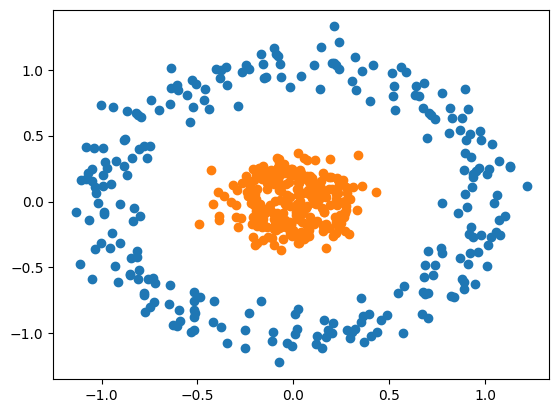

In [23]:
# get all points (coordinates) which have label y = 0 
x_coords = X[y == 0, 0] # x coordinates (all rows in X) which have label y = 0
y_coords = X[y == 0, 1] # y coordinates (all rows in X) which have label y = 0
plt.scatter(x_coords, y_coords)

# get all points (coordinates) which have label y = 1 
x_coords = X[y == 1, 0] # x coordinates which has (all rows) label y = 1
y_coords = X[y == 1, 1] # y coordinates which has (all rows) label y = 1
plt.scatter(x_coords, y_coords)

In [24]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 
from keras import Input

In [25]:
model = Sequential()

# our perceptron
model.add(Input(shape=(2,))) # input layer
model.add(Dense(units=4, activation='sigmoid')) # hidden layer
model.add(Dense(units=1, activation='sigmoid')) # output layer
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='binary_crossentropy',  
    metrics=['accuracy']
)

In [26]:
model_his = model.fit(
    x=X, y=y, 
    verbose= 1,
    batch_size= 20,
    epochs=100, 
    shuffle='true'
)

Epoch 1/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.4520
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.6620
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5360
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.3580
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5940
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5140
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5000
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.6580
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.6740
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.5420
Epoch 11/

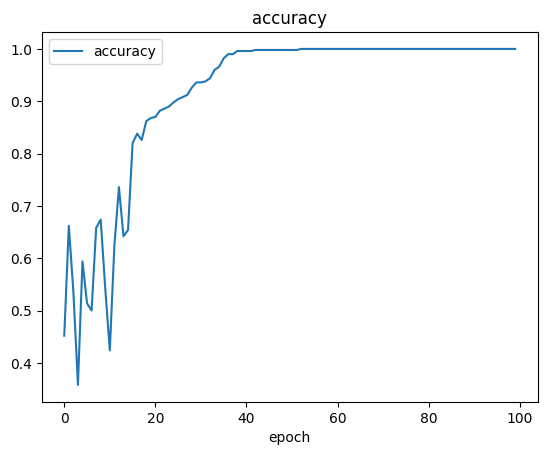

In [27]:
plt.plot(model_his.history['accuracy']) 
plt.xlabel('epoch') # so the x axis will automatically set to = as number of epochs
plt.title('accuracy')
plt.legend(['accuracy'])

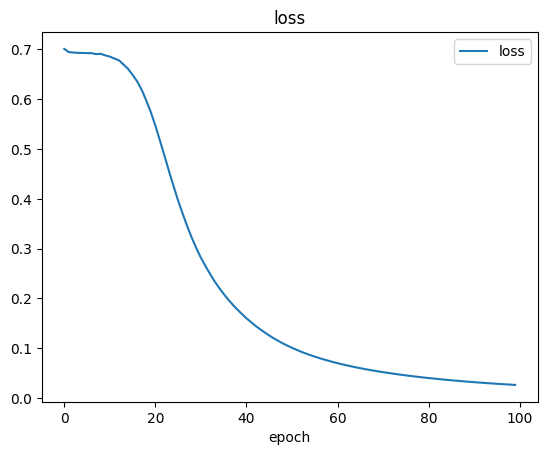

In [28]:
plt.plot(model_his.history['loss']) 
plt.xlabel('epoch') 
plt.title('loss')
plt.legend(['loss'])

1/1 [==============================] - 0s 16ms/step
prediction is:  [[0.99057734]]


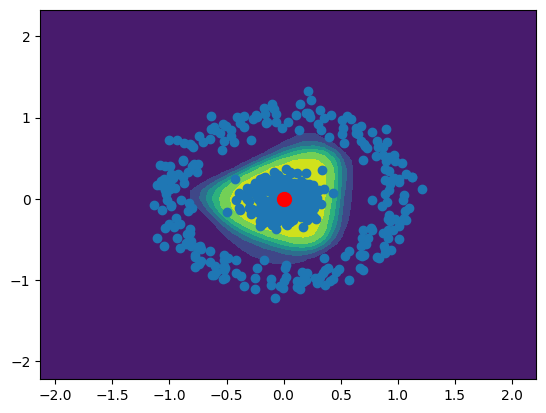

In [35]:
def plot_decision_boundary(X, y, model):
    # 2d grid needs x and y coordinates
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)

    xx_flatten = xx.ravel()
    yy_flatten = yy.ravel()
    
    grid_points = np.c_[xx_flatten, yy_flatten] #  concatenation
    pred = model.predict(grid_points)
    zz = pred.reshape(xx.shape)
    plt.contourf(xx, yy, zz)


plot_decision_boundary(X, y, model)

plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

x = 0
y = 0
a_point = [x, y]
pred = model.predict(np.array([a_point]))
plt.plot([x], [y], marker='o', markersize=10, color='red')
print('prediction is: ', pred)
